# **<ins> Notebook Name </ins>: <ins> Predicting Heart Disease Stages through Machine Learning Algorithms</ins>**

<div style="text-align:center">



</div>



## **<ins> Author: Farwa Khalid </ins>**

**About Author:**

**Github accout: [FarwaK05]("https://github.com/FarwaK05")**

**Keggel account:[Farwa99](https://www.kaggle.com/farwa99)**

**Linkdin accout:[Farwa Khalid](https://www.linkedin.com/in/farwa-khalid-895527280/)**

## **<span style="color:Blue">Purpose:</span>**

<span style = "color:yellow">The primary objective of this notebook is to implement various machine learning models on the dataset, train the data using these models, and subsequently identify the most optimal model based on test accuracy.</span>

## **<span style="color:blue">Meta-Data (About Dataset)</span>**
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## **Content:**

Column Descriptions:

1- `id` (Unique id for each patient)

2- `age` (Age of the patient in years)

3- `dataset` (place of study)

4- `sex` (Male/Female)

5- `cp` chest pain type 

- typical angina

- atypical angina
 
- non-anginal
  
- asymptomatic

6- `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7- `chol` (serum cholesterol in mg/dl)

8- `fbs` (if fasting blood sugar > 120 mg/dl)

9- `restecg` (resting electrocardiographic results)

**Values**:

- normal
 
-  stt abnormality 
  
-  lv hypertrophy

10-` thalach`: maximum heart rate achieved

11- `exang`: exercise-induced angina (True/ False)

12- `oldpeak`: ST depression induced by exercise relative to rest

13- `slope`: the slope of the peak exercise ST segment

14- `ca`: number of major vessels (0-3) colored by fluoroscopy

15- `thal`: [normal; fixed defect; reversible defect]

16- `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## <span style="color:green">Importing Important Libraries:</span>

In [1]:
# importing libraries:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, precision_score, r2_score, mean_squared_error
# impot pipeline
from sklearn.pipeline import Pipeline
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# <ins> Importing Dataset:</ins>

In [2]:
# import dataset:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

#### <ins>Checking the dataset:</ins>

In [3]:
#Checking shape of the dataset:
print(df.shape)

(920, 16)


In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# <ins>Checking missing values:</ins>

In [6]:
print(df.isnull().sum().sort_values(ascending=False))

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


## **<span style= "color:blue"> Let's joyfully 🎉 dive into the fascinating world within the columns! Are you filled with excitement? Because I certainly am! </span>🌟**

 **Defining the function to get the mean median and mode:**

In [7]:
def stats_of_column(df, column):
    if column not in df.columns:
        raise ValueError(f"{column} not found in dataframe columns")
    
    # calculate mean
    mean = df[column].mean()
    
    # calculate median
    median = df[column].median()
    
    # calculate mode
    mode = df[column].mode()[0]
    
    print(f"mode:{mode}\nmedian:{median}\nmean:{mean}")

## **<ins>Unveiling the Enigmatic `Age` Column Realm</ins>** 🕵️‍♂️

In [8]:
# Age column:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Mean: 53.51086956521739
Median: 54.0
Mode: 54


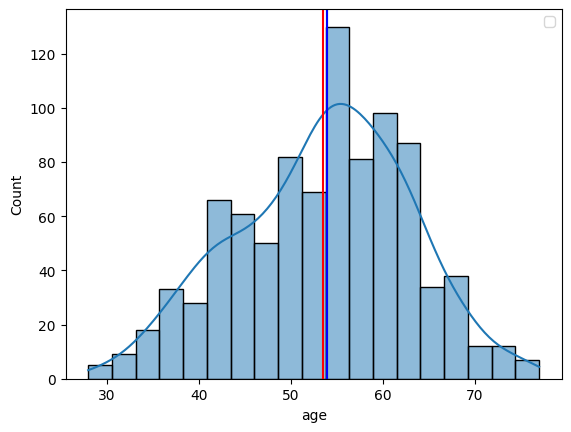

In [9]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')
plt.legend(loc='upper right')
# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [10]:
# Let's explore the gender based distribution of the dataset for age column.
print(stats_of_column(df,'age'))
# plot the histogram of age column using plotly and coloring this by sex
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

mode:54
median:54.0
mean:53.51086956521739
None


In [11]:
# Assuming you have a DataFrame named 'df' with columns 'age' and 'dataset'
# Replace 'your_dataset_column_name' with the actual name of the dataset column

# Grouping by 'dataset' column and calculating mean, median, and mode of 'age' column
grouped_stats = df.groupby('dataset')['age'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

# Renaming the columns for clarity
grouped_stats.columns = ['mean_age', 'median_age', 'mode_age']

# Displaying the observations
print(grouped_stats.round())

               mean_age  median_age  mode_age
dataset                                      
Cleveland          54.0        56.0        58
Hungary            48.0        49.0        54
Switzerland        55.0        56.0        61
VA Long Beach      59.0        60.0        62


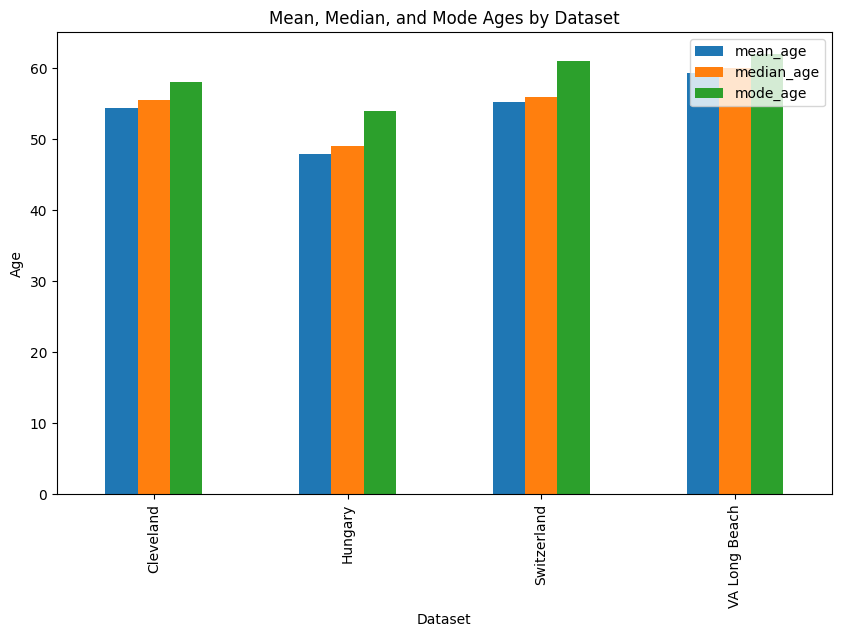

In [12]:
grouped_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Mean, Median, and Mode Ages by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.legend(loc='upper right')
plt.show()

**Observations:**

- The minimum age to have a heart disease starts from 28 years old.
-  Most of the people get heart disease at the age of 53-54 years.
- Cleveland has the highest mean age (54.35), indicating a central tendency towards higher ages.

- Hungary has the lowest mean (47.89) and median age (49.0), suggesting a relatively younger age distribution.

- Cleveland and Hungary have single modes at 58 and 54, respectively, indicating a concentration of ages around these values.
   
- Switzerland has a mode at 61, suggesting a peak in the age distribution.
 
- VA Long Beach has multiple modes (62 and 63), indicating potential subgroups within the dataset.

## **<ins>Unveiling the Enigmatic `sex` Column Realm**</ins> 🕵️‍♂️

In [13]:
# find the values of sex column
print(df['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


In [14]:
print(df.groupby('sex')['age'].value_counts())

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
        41      7
        55      7
        49      7
        58      7
        50      7
        57      6
        45      6
        64      6
        53      6
        63      6
        52      5
        60      5
        56      5
        65      4
        66      4
        61      4
        47      4
        46      4
        37      4
        71      3
        67      3
        59      3
        44      3
        42      3
        39      3
        38      3
        35      3
        34      2
        30      1
        31      1
        76      1
        74      1
        73      1
        69      1
        68      1
        40      1
        33      1
        32      1
Male    58     36
        54     36
        55     34
        56     33
        59     32
        57     32
        52     31
        61     27
        60     27
        53     27
        62     25
        51     2

In [15]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


**Observations:**
- Most of the males and females get are with heart disease at the age of 54-55 years.
- Male percentage in the data: 78.91%
- Female Percentage in the data: 21.09%
- Males are 274.23% more than females in the data.

## <ins>**Decoding Insights from the `Dataset` Column**</ins> 📊🔍

In [16]:
# Lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [17]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [18]:
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [19]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")


Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


**Observations:**
We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).

## **<ins>Unveiling the Depths of the cp (Chest Pain) Column**</ins> 🫀🔍

In [20]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


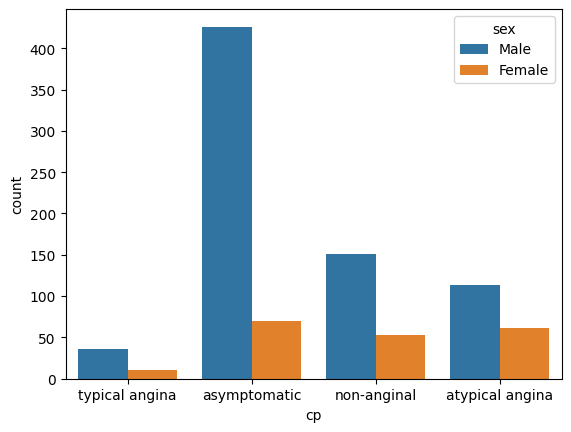

In [21]:
# count plot of cp column by sex column
print(sns.countplot(df, x='cp', hue='sex'))

In [22]:
df.groupby(df['cp'])['sex'].value_counts()

cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64

In [23]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

Observations:

"Asymptomatic" chest pain (496 cases), indicating a substantial portion of individuals exhibit no noticeable symptoms.

"Typical Angina" is less frequent, observed in only 46 cases, suggesting a lower representation of classic angina symptoms.

The presence of "Non-anginal" and "Atypical Angina" types emphasizes the diversity in chest pain presentations

   

## **<ins>Delving into the `trestbps (resting blood pressure)` Column</ins>** 🩸🔍

- <span style="color:yellow">The normal resting blood pressure is 120/80 mm Hg.</span>
- <span style= "color:yellow">Hypertension is often defined as a blood pressure reading consistently higher than 130/80 mm Hg.
If left untreated, high blood pressure can lead to serious health problems, including heart disease, stroke, and kidney damage.</span>

- <span style= "color:yellow">Low blood pressure is generally considered a reading below 90/60 mm Hg.
While some people naturally have low blood pressure and experience no adverse effects, others may have symptoms like dizziness, fainting, or fatigue.</span>

In [24]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Axes(0.125,0.11;0.775x0.77)


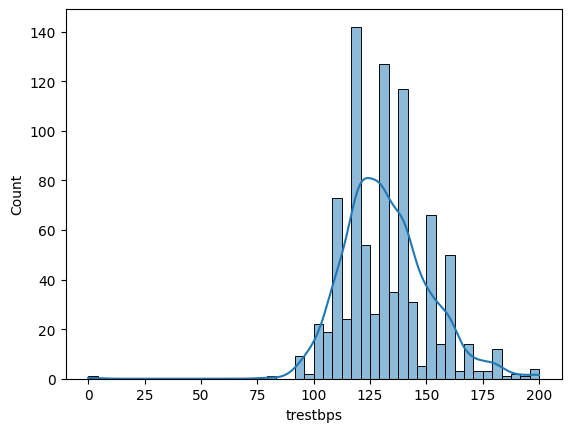

In [25]:
# create a histplot of trestbps column
print(sns.histplot(df['trestbps'], kde=True))

In [26]:
print(stats_of_column(df,'trestbps'))
# make a plot of trestbps column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='trestbps', color='dataset')
fig.show()

mode:120.0
median:130.0
mean:132.13240418118468
None


In [27]:
print(df['trestbps'].value_counts())

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
160.0     50
125.0     29
115.0     19
135.0     18
128.0     17
145.0     16
100.0     15
138.0     15
112.0     14
170.0     14
124.0     12
180.0     12
122.0     12
132.0     12
118.0     10
134.0      9
142.0      9
105.0      9
136.0      8
155.0      8
108.0      7
152.0      7
126.0      7
144.0      6
95.0       6
200.0      4
158.0      4
178.0      3
146.0      3
106.0      3
104.0      3
154.0      3
102.0      3
156.0      2
114.0      2
190.0      2
116.0      2
165.0      2
148.0      2
172.0      2
94.0       2
123.0      1
92.0       1
96.0       1
0.0        1
185.0      1
80.0       1
117.0      1
113.0      1
129.0      1
98.0       1
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, dtype: int64


In [28]:
df.groupby(df['trestbps'])[['sex']].describe()

sex                    
         count unique     top freq
trestbps                          
0.0          1      1    Male    1
80.0         1      1    Male    1
92.0         1      1    Male    1
94.0         2      2    Male    1
95.0         6      2    Male    5
96.0         1      1    Male    1
98.0         1      1    Male    1
100.0       15      2    Male   11
101.0        1      1    Male    1
102.0        3      2  Female    2
104.0        3      1    Male    3
105.0        9      2    Male    5
106.0        3      2    Male    2
108.0        7      2  Female    4
110.0       59      2    Male   48
112.0       14      2    Male   11
113.0        1      1  Female    1
114.0        2      2    Male    1
115.0       19      2    Male   17
116.0        2      1    Male    2
117.0        1      1    Male    1
118.0       10      2    Male    8
120.0      131      2    Male   99
122.0       12      2    Male   10
123.0        1      1    Male    1
124.0       12      2    Male    9
125.0       29      2    Male   27
126.0        7      2    Male    6
127.0        1      1  Female    1
128.0       17      2    Male   14
129.0        1      1    Male    1
130.0      115      2    Male   85
132.0       12      2    Male    8
134.0        9      2    Male    7
135.0       18      2    Male   14
136.0        8      2    Male    6
138.0       15      2  Female    8
140.0      102      2    Male   84
142.0        9      2    Male    7
144.0        6      1    Male    6
145.0       16      2    Male   15
146.0        3      2    Male    2
148.0        2      1    Male    2
150.0       56      2    Male   43
152.0        7      2    Male    6
154.0        3      1    Male    3
155.0        8      2    Male    6
156.0        2      1    Male    2
158.0        4      2    Male    3
160.0       50      2    Male   39
164.0        1      1    Male    1
165.0        2      1    Male    2
170.0       14      2    Male   12
172.0        2      1    Male    2
174.0        1      1  Female    1
178.0        3      2    Male    2
180.0       12      2    Male    7
185.0        1      1    Male    1
190.0        2      1    Male    2
192.0        1      1    Male    1
200.0        4      2  Female    2

Obseravtion:
- The column 'trestbps' have the mode is 120.0 , median is 130.0 and the mean is 132.
- A trestbps mode of 120 implies that a predominant number of individuals exhibit a normal blood pressure level.
- The maximum blood pressure recorded is 200, with a total of 4 individuals exhibiting this reading.
- The minimum blood pressure is 0.0, observed in a single individual. This may potentially be an outlier, and we will address this matter in further discussion.

## **<ins>Unraveling the Secrets of the `Chol (Cholesterol Level)` Column</ins> 🧪🔍**

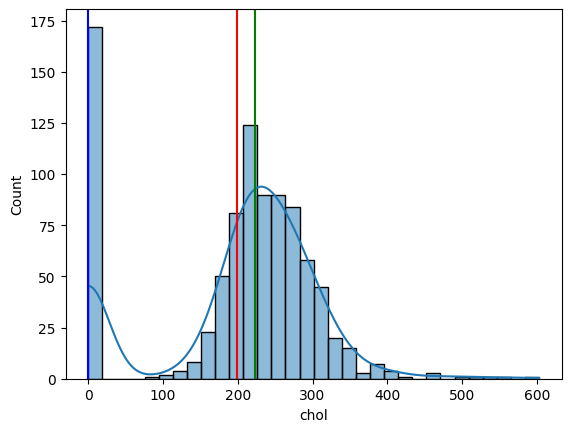

In [29]:
 # `chol` (serum cholesterol in mg/dl)
sns.histplot(df['chol'], kde=True)
plt.axvline(df['chol'].mean(), color='red')
plt.axvline(df['chol'].median(), color='green')
plt.axvline(df['chol'].mode()[0], color='blue')

In [30]:
df.groupby(df['chol'])[['sex']].describe()

sex                    
      count unique     top freq
chol                           
0.0     172      2    Male  161
85.0      1      1    Male    1
100.0     2      1    Male    2
117.0     1      1    Male    1
126.0     1      1    Male    1
129.0     1      1    Male    1
131.0     1      1    Male    1
132.0     1      1    Male    1
139.0     1      1    Male    1
141.0     1      1  Female    1
142.0     1      1    Male    1
147.0     2      1    Male    2
149.0     2      2    Male    1
153.0     1      1    Male    1
156.0     1      1    Male    1
157.0     1      1    Male    1
160.0     5      2    Male    3
161.0     2      2  Female    1
163.0     2      2    Male    1
164.0     2      2  Female    1
165.0     1      1    Male    1
166.0     3      1    Male    3
167.0     2      2    Male    1
168.0     2      1    Male    2
169.0     1      1    Male    1
170.0     2      1    Male    2
171.0     3      1    Male    3
172.0     2      1    Male    2
173.0     2      2  Female    1
174.0     1      1    Male    1
175.0     4      1    Male    4
176.0     1      1    Male    1
177.0     5      2    Male    4
178.0     1      1  Female    1
179.0     2      1    Male    2
180.0     3      2  Female    2
181.0     1      1    Male    1
182.0     5      2    Male    4
183.0     1      1  Female    1
184.0     4      2    Male    3
185.0     1      1    Male    1
186.0     6      2    Male    5
187.0     2      1    Male    2
188.0     4      2    Male    3
190.0     1      1  Female    1
192.0     3      1    Male    3
193.0     6      2    Male    5
194.0     2      2    Male    1
195.0     6      2    Male    4
196.0     6      2    Male    5
197.0     7      2    Male    4
198.0     6      2    Male    4
199.0     3      2    Male    2
200.0     4      2    Male    3
201.0     6      2    Male    3
202.0     3      2    Male    2
203.0     7      1    Male    7
204.0     9      2    Male    7
205.0     3      2  Female    2
206.0     3      1    Male    3
207.0     6      2    Male    5
208.0     5      1    Male    5
209.0     5      2    Male    3
210.0     4      2  Female    2
211.0     9      2    Male    6
212.0     6      1    Male    6
213.0     7      2    Male    6
214.0     7      2    Male    5
215.0     5      2    Male    3
216.0     9      2    Male    7
217.0     4      1    Male    4
218.0     6      2    Male    5
219.0     9      2    Male    6
220.0    10      2    Male    8
221.0     5      2    Male    4
222.0     6      1    Male    6
223.0     9      2    Male    7
224.0     6      1    Male    6
225.0     6      2    Male    4
226.0     6      2    Male    5
227.0     4      2    Male    3
228.0     5      2    Male    4
229.0     4      1    Male    4
230.0     9      2    Male    7
231.0     5      1    Male    5
232.0     3      1    Male    3
233.0     6      1    Male    6
234.0     7      2    Male    5
235.0     3      1    Male    3
236.0     6      2    Male    4
237.0     6      2    Male    4
238.0     4      2    Male    3
239.0     4      2    Male    3
240.0     8      2    Male    7
241.0     3      2    Male    2
242.0     2      2  Female    1
243.0     7      2    Male    6
244.0     4      2    Male    2
245.0     6      2    Male    5
246.0     8      2    Male    7
247.0     3      1    Male    3
248.0     6      2    Male    4
249.0     5      2    Male    3
250.0     5      2    Male    3
251.0     1      1    Male    1
252.0     3      2    Male    2
253.0     4      2    Male    3
254.0    10      2    Male    8
255.0     3      1    Male    3
256.0     5      2    Male    4
257.0     3      2    Male    2
258.0     7      2    Male    5
259.0     2      1    Male    2
260.0     8      2    Male    7
261.0     3      1    Male    3
262.0     1      1    Male    1
263.0     7      2    Male    6
264.0     6      2    Male    5
265.0     4      2  Female    2
266.0     4      2    Male    3
267.0     5      2    Male    4
268.0     5      2    Male    3
269.0   

In [31]:
c =  df.groupby(df['sex'])['chol'].describe()
c

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,187.0,241.481283,86.291226,0.0,204.0,244.0,291.0,564.0
Male,703.0,187.864865,113.858400,0.0,156.5,220.0,263.0,603.0


**Observations:**

- The median and mode of the cholesterol (chol) exhibit close proximity, with a median of 221, a mean of 199, and a mode of 0.

- In the 'chol' column of the DataFrame (df), the maximum value is 603, and the minimum value is 0, representing the cholesterol levels of individuals.
  
- It is evident that the maximum cholesterol level for men is 603, while for women, the highest level is 564.
 

## <ins>Navigating the `fbs (Fasting Blood Sugar > 120 mg/dl)` Column</ins> 🌅🔍

In [32]:
# The fbs is fasting blood sugar 
df['fbs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: fbs
Non-Null Count  Dtype 
--------------  ----- 
830 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [33]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [34]:
df.groupby(df['fbs'])[['sex']].value_counts()

fbs    sex   
False  Male      528
       Female    164
True   Male      119
       Female     19
Name: count, dtype: int64

In [35]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, y='age',x = 'sex', color='fbs')
fig.show()

Observations:
- Based on the observation, it is apparent that 692 individuals possess a False value for the fbs, indicating that they do not have a favorable sugar level. Conversely, the 138 individuals with True values have a positive or appropriate sugar level.
- The correct fasting blood sugar (fbs) level for men is 119, and for women, it is 19, signifying an appropriate sugar level in these individuals.
- There are 528 instances among men where the value is inaccurate, and for women, there are 164 cases with an incorrect value, indicating an undesirable sugar level in these individuals.

## **<ins>Unveiling the Mysteries of the `restecg (Resting Electrocardiographic Results)` Column</ins> 📊🔍**

In [36]:
df['restecg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: restecg
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [37]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [38]:
df.groupby(df['restecg'])[['sex']].value_counts()

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      432
                  Female    119
st-t abnormality  Male      151
                  Female     28
Name: count, dtype: int64

In [39]:
df.groupby(df['restecg'])[['dataset']].value_counts()

restecg           dataset      
lv hypertrophy    Cleveland        149
                  VA Long Beach     27
                  Switzerland        7
                  Hungary            5
normal            Hungary          235
                  Cleveland        151
                  Switzerland       85
                  VA Long Beach     80
st-t abnormality  VA Long Beach     93
                  Hungary           52
                  Switzerland       30
                  Cleveland          4
Name: count, dtype: int64

In [40]:
df.groupby(df['restecg'])[['dataset','sex']].value_counts()

restecg           dataset        sex   
lv hypertrophy    Cleveland      Male      104
                                 Female     45
                  VA Long Beach  Male       26
                  Switzerland    Male        7
                  Hungary        Male        4
                  VA Long Beach  Female      1
                  Hungary        Female      1
normal            Hungary        Male      177
                  Cleveland      Male      102
                  Switzerland    Male       77
                  VA Long Beach  Male       76
                  Hungary        Female     58
                  Cleveland      Female     49
                  Switzerland    Female      8
                  VA Long Beach  Female      4
st-t abnormality  VA Long Beach  Male       92
                  Hungary        Male       30
                  Switzerland    Male       28
                  Hungary        Female     22
                  Cleveland      Female      3
                  Sw

Axes(0.125,0.11;0.775x0.77)


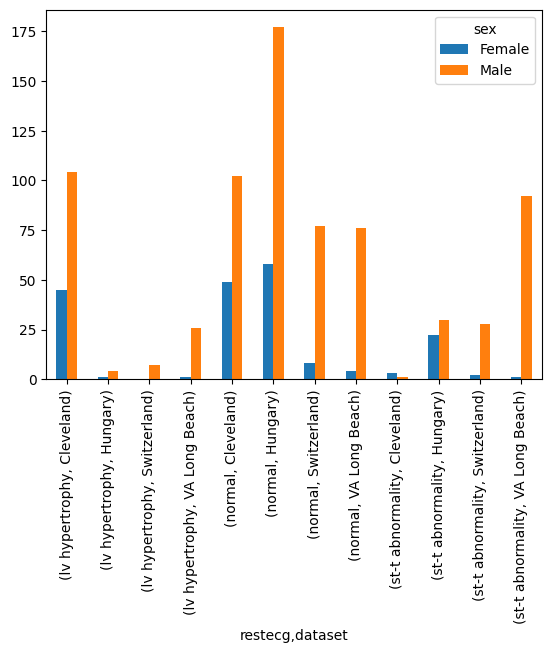

In [41]:
counts = df.groupby(df['restecg'])[['dataset','sex']].value_counts().unstack()
print(counts.plot.bar())

Observation:
- The highest incidence of individuals suffering from "Iv hypertrophy" is observed in Cleveland, totaling 149. Among them, 104 are men, and 45 are women.

- The majority of individuals with "normal restecg" are from Hungary, numbering 235. Among them, 177 are men, and 102 are women.

- Individuals with "st-t abnormality" are exclusively from VA Long Beach, with a count of 92, all of whom are men.

- Overall, the observation highlights that a significant proportion of individuals exhibit a normal restecg.

## **<ins>Embarking on the Journey of the `thalch (Maximum Heart Rate Achieved)` Column</ins>** 💓🔍


In [42]:
df['thalch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: thalch
Non-Null Count  Dtype  
--------------  -----  
865 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


Axes(0.125,0.11;0.775x0.77)


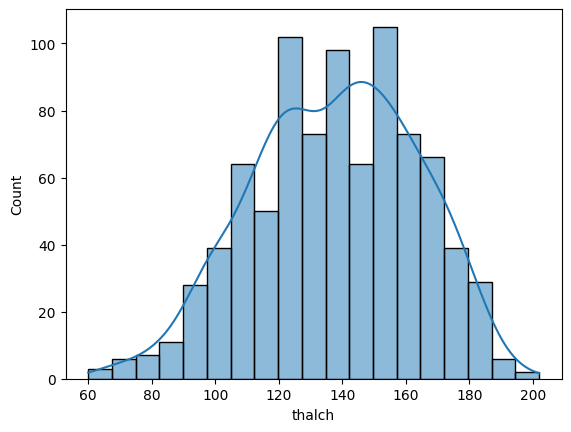

In [43]:
print(sns.histplot(df['thalch'],kde = True))

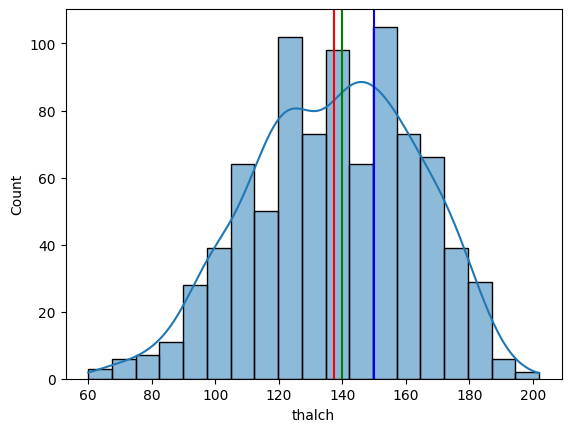

In [44]:
 # `chol` (serum cholesterol in mg/dl)
sns.histplot(df['thalch'], kde=True)
plt.axvline(df['thalch'].mean(), color='red')
plt.axvline(df['thalch'].median(), color='green')
plt.axvline(df['thalch'].mode()[0], color='blue')

In [45]:
df['thalch'].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [46]:
grouped_stats = df.groupby('dataset')['thalch'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

# Renaming the columns for clarity
grouped_stats.columns = ['mean_thalch', 'median_thalch', 'mode_thalch']

# Displaying the observations
print(grouped_stats.round())

               mean_thalch  median_thalch  mode_thalch
dataset                                               
Cleveland            150.0          153.0        162.0
Hungary              139.0          140.0        150.0
Switzerland          122.0          121.0        120.0
VA Long Beach        123.0          120.0        120.0


Observation:
- The mean_thalch values are highest in Cleveland (150.0) and lowest in Switzerland (122.0).
  
- The median_thalch values show a similar trend, with the highest in Cleveland (153.0) and the lowest in Switzerland (121.0).
  
- The mode_thalch values vary, with Cleveland having the highest mode (162.0) and Switzerland having the lowest (120.0).

## **<ins>Uncovering the Depths of the `exang (Exercise-Induced Angina)` Column</ins>** 🏋️‍♂️🔍

In [47]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [48]:
df.groupby(df['exang'])[['sex']].value_counts()

exang  sex   
False  Male      379
       Female    149
True   Male      294
       Female     43
Name: count, dtype: int64

In [49]:
df.groupby(df['restecg'])['exang'].value_counts()

restecg           exang
lv hypertrophy    False    112
                  True      69
normal            False    337
                  True     195
st-t abnormality  False     77
                  True      73
Name: count, dtype: int64

In [50]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
grouped_counts = df.groupby(['restecg', 'exang']).size().reset_index(name='count')

fig = px.bar(grouped_counts, x='exang', y='count', color='restecg',
             text='count', facet_col='restecg', facet_col_wrap=3,
             labels={'exang': 'Exang', 'count': 'Count'})

fig.update_layout(title='Exang Counts by Restecg',
                  xaxis_title='Exang',
                  yaxis_title='Count')

fig.show()


Obseravtion:
- Observing the data, it is evident that a larger number of individuals, 379 men and 149 women, show a false value for exang, indicating an absence of anginal pain.
  
- Among those reporting anginal pain, totaling 337 individuals, 294 are men, and 43 are women.
  
- Notably, a significant proportion of individuals with a normal restecg also test false for exang. Out of 551 individuals with a normal restecg, 337 tested negative (false) for exang, while only 195 tested positive (true).

## **<ins>Investigating the `oldpeak` Column</ins>** 🕵️‍♂️🔍

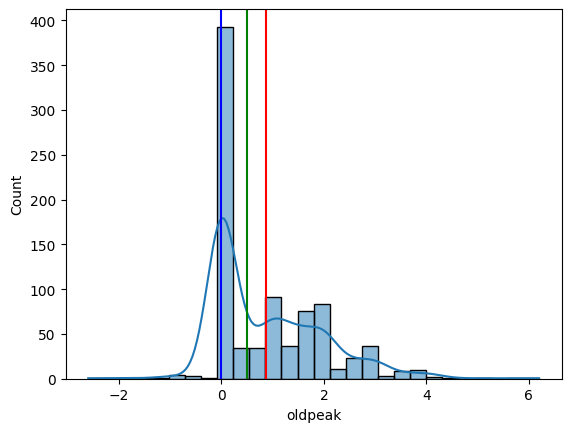

In [51]:
sns.histplot(df['oldpeak'], kde=True)
plt.axvline(df['oldpeak'].mean(), color='red')
plt.axvline(df['oldpeak'].median(), color='green')
plt.axvline(df['oldpeak'].mode()[0], color='blue')

In [52]:
stats_of_column(df,'oldpeak')

mode:0.0
median:0.5
mean:0.8787878787878788


In [53]:
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

- The observation shows that the mode is 0 and the median is 0.5 and the mean is 0.87 

## <ins>Unraveling the `slope`: the slope of the peak exercise ST segment Column</ins> 📈🔍

In [54]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [55]:
df.groupby(df['slope'])['restecg'].value_counts()

slope        restecg         
downsloping  normal               31
             lv hypertrophy       17
             st-t abnormality     15
flat         normal              206
             lv hypertrophy       84
             st-t abnormality     55
upsloping    normal              116
             lv hypertrophy       64
             st-t abnormality     22
Name: count, dtype: int64

- Value count of the downsloping is more for the Iv hypertrophy,the valuecount of the flat slope is more for the normal restcg 206 and the upsloping bis also more is peopel with the normal restcg

## **<ins>Unraveling the `ca (Number of Major Vessels Colored by Fluoroscopy)` Column</ins>** 🔍

In [56]:
df['ca'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: ca
Non-Null Count  Dtype  
--------------  -----  
309 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


In [57]:
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

- The maximum valuecount ids of the df['col'] equal to zero the minmum value count is of 3.

## **<ins>Journeying through the `thal (Thalassemia Type)` Column</ins>** 🩸🔍

In [58]:
df['thal'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: thal
Non-Null Count  Dtype 
--------------  ----- 
434 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [59]:
print(df['thal'].unique())

['fixed defect' 'normal' 'reversable defect' nan]


In [60]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [61]:
df.groupby(df['thal'])['sex'].value_counts()

thal               sex   
fixed defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable defect  Male      171
                   Female     21
Name: count, dtype: int64

In [62]:
df.groupby(df['thal'])[['sex','dataset']].value_counts()

thal               sex     dataset      
fixed defect       Male    Cleveland         17
                           Switzerland       10
                           VA Long Beach      8
                           Hungary            7
                   Female  Hungary            3
                           Cleveland          1
normal             Male    Cleveland         86
                   Female  Cleveland         80
                   Male    Switzerland       14
                           Hungary            6
                   Female  Switzerland        5
                   Male    VA Long Beach      4
                   Female  Hungary            1
reversable defect  Male    Cleveland        102
                           Switzerland       41
                           VA Long Beach     20
                   Female  Cleveland         15
                   Male    Hungary            8
                   Female  Hungary            3
                           VA Long Beach      2

In [63]:
df.groupby(df['thal'])['fbs'].value_counts()

thal               fbs  
fixed defect       False     28
                   True      12
normal             False    166
                   True      22
reversable defect  False    145
                   True      33
Name: count, dtype: int64

In [64]:
df.groupby(df['thal'])[['sex','dataset']].value_counts()

thal               sex     dataset      
fixed defect       Male    Cleveland         17
                           Switzerland       10
                           VA Long Beach      8
                           Hungary            7
                   Female  Hungary            3
                           Cleveland          1
normal             Male    Cleveland         86
                   Female  Cleveland         80
                   Male    Switzerland       14
                           Hungary            6
                   Female  Switzerland        5
                   Male    VA Long Beach      4
                   Female  Hungary            1
reversable defect  Male    Cleveland        102
                           Switzerland       41
                           VA Long Beach     20
                   Female  Cleveland         15
                   Male    Hungary            8
                   Female  Hungary            3
                           VA Long Beach      2

In [65]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
grouped_counts = df.groupby(['thal', 'sex', 'dataset']).size().reset_index(name='count')

fig = px.bar(grouped_counts, x='sex', y='count', color='dataset',
             facet_col='thal', facet_col_wrap=3,
             labels={'sex': 'Sex', 'count': 'Count', 'dataset': 'Dataset'},
             title='Counts by Thal and Sex')

fig.show()


Observation:
- Only 4 women have the fixed defect, with 3 of them from Hungary and 1 from Cleveland.

- Cleveland has the highest number of women with a normal thal, totaling 80, surpassing the counts in the other three countries.

- Male individuals from Cleveland exhibit the highest number of reversible defect thal compared to any other country in the dataset.

- The prevalence of false fbs is higher among individuals with a normal thal.





## **<ins>Delving into the `num (Heart Disease Presence)` Column</ins>** ❤️🔍

In [66]:
print(df['num'].unique())

[0 2 1 3 4]


In [67]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [68]:
df.groupby(df['num'])[['dataset']].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

In [69]:
df.groupby(df['num'])[['dataset','sex']].value_counts()

num  dataset        sex   
0    Hungary        Male      118
     Cleveland      Male       93
                    Female     72
     Hungary        Female     69
     VA Long Beach  Male       48
     Switzerland    Male        8
     VA Long Beach  Female      3
1    Hungary        Male       94
     VA Long Beach  Male       53
     Cleveland      Male       46
     Switzerland    Male       42
     Hungary        Female     12
     Cleveland      Female      9
     Switzerland    Female      6
     VA Long Beach  Female      3
2    VA Long Beach  Male       41
     Switzerland    Male       29
     Cleveland      Male       29
                    Female      7
     Switzerland    Female      3
3    VA Long Beach  Male       42
     Switzerland    Male       29
     Cleveland      Male       28
                    Female      7
     Switzerland    Female      1
4    Cleveland      Male       11
     VA Long Beach  Male       10
     Switzerland    Male        5
     Cleveland      F

In [70]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
grouped_counts = df.groupby(['num', 'dataset', 'sex']).size().reset_index(name='count')

fig = px.bar(grouped_counts, x='sex', y='count', color='dataset',
             facet_col='num', facet_col_wrap=3,
             labels={'sex': 'Sex', 'count': 'Count', 'dataset': 'Dataset'},
             title='Counts by Num and Sex')

fig.show()


Observations:
- There are 411 individuals with no heart disease, with the majority, 187, originating from Hungary.

- Among those with stage 1 disease (265 individuals), the highest number, 106, is from Hungary.

- Individuals with stage 2 disease (109 in total) are most prevalent in VA Long Beach, with 48 cases.

- For stage 3 disease (28 individuals), Cleveland leads with 13 cases.

### **<ins>Upon inspecting all columns, can the hidden bonds between numeric columns be revealed? Undoubtedly, this task is achievable through the meticulous application of correlation analysis.</ins>**



In [71]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


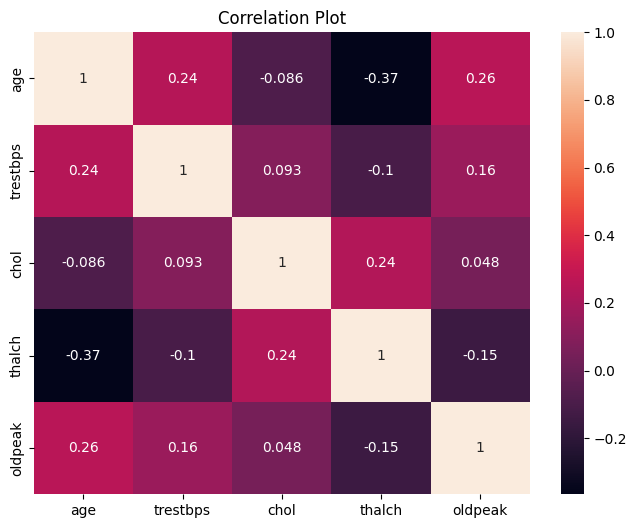

In [72]:
# Draw the correaltion plot:
df_corr = ['age','trestbps','chol','thalch','oldpeak']
plt.figure(figsize=(8, 6))
sns.heatmap(df[df_corr].corr(), annot=True)
plt.title("Correlation Plot")
plt.show()


## **<ins>Insights from the correlation Tabel:</ins>**

**<span style="color:blue">Positive correlations:</span>**

There is a positive correlation between age and trestbps (resting blood pressure), which means that as people get older, their resting blood pressure tends to increase. This is a well-established risk factor for heart disease.

There is a positive correlation between trestbps and chol (total cholesterol), which means that people with higher resting blood pressure also tend to have higher cholesterol levels. This is another risk factor for heart disease.

There is a positive correlation between chol and thalch (maximum heart rate achieved). This means that people with higher cholesterol levels also tend to have higher maximum heart rates.

**<span style="color:red">Negative correlations:</span>**

There is a negative correlation between age and oldpeak (ST segment depression induced by exercise relative to rest). This means that as people get older, they tend to have a smaller ST segment depression. This is a good thing, as a larger ST segment depression is a sign of heart disease.

There is a negative correlation between trestbps and oldpeak. This means that people with higher resting blood pressure tend to have a smaller ST segment depression. Again, this is a good thing.

There is a negative correlation between chol and oldpeak. This means that people with higher cholesterol levels tend to have a smaller ST segment depression. Once again, this is a good thing.

### **<ins>In the shadows of data, a suspenseful quest unfolds: the moment to unearth the secrets concealed within the art of handling missing values has arrived</ins>** 🕵️‍♂️📊

In [73]:
print(df.isnull().sum().sort_values(ascending=False))

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


In [74]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

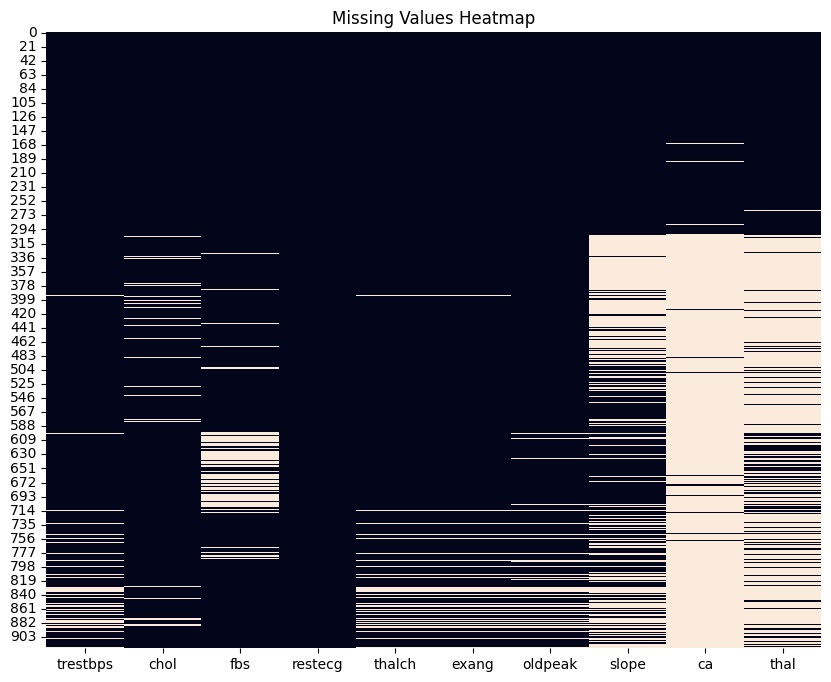

In [75]:
# create heatmap for the missing values:
plt.figure(figsize=(10, 8))
sns.heatmap(df[missing_data_cols].isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [76]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [77]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [78]:
import warnings
warnings.filterwarnings('ignore')
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.329132947976882 

RMSE = 17.411554531800796 

R2 = 0.05342966036589458 

Missing Values chol : 3.26%
MAE = 44.35303370786517 

RMSE = 63.27798798986062 

R2 = 0.6828067265083229 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 62.5 accuracy

Missing Values thalch : 5.98%
MAE = 16.67265895953757 

RMSE = 21.47449872233861 

R2 = 0.3294434896281475 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5508139534883721 

RMSE = 0.7737277328952108 

R2 = 0.42965941981800615 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 75.86 accuracy



In [79]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


**<span style="color:yellow">The missing values puzzle has been solved, bringing about a joyous resolution and lifting the lingering stress.:</span> 🧩🎉**

### **<ins>Embark on an adventurous quest into the realm of outliers, where together, we shall conquer the enigma and unveil their secrets!</ins> 🌌🗝️.**

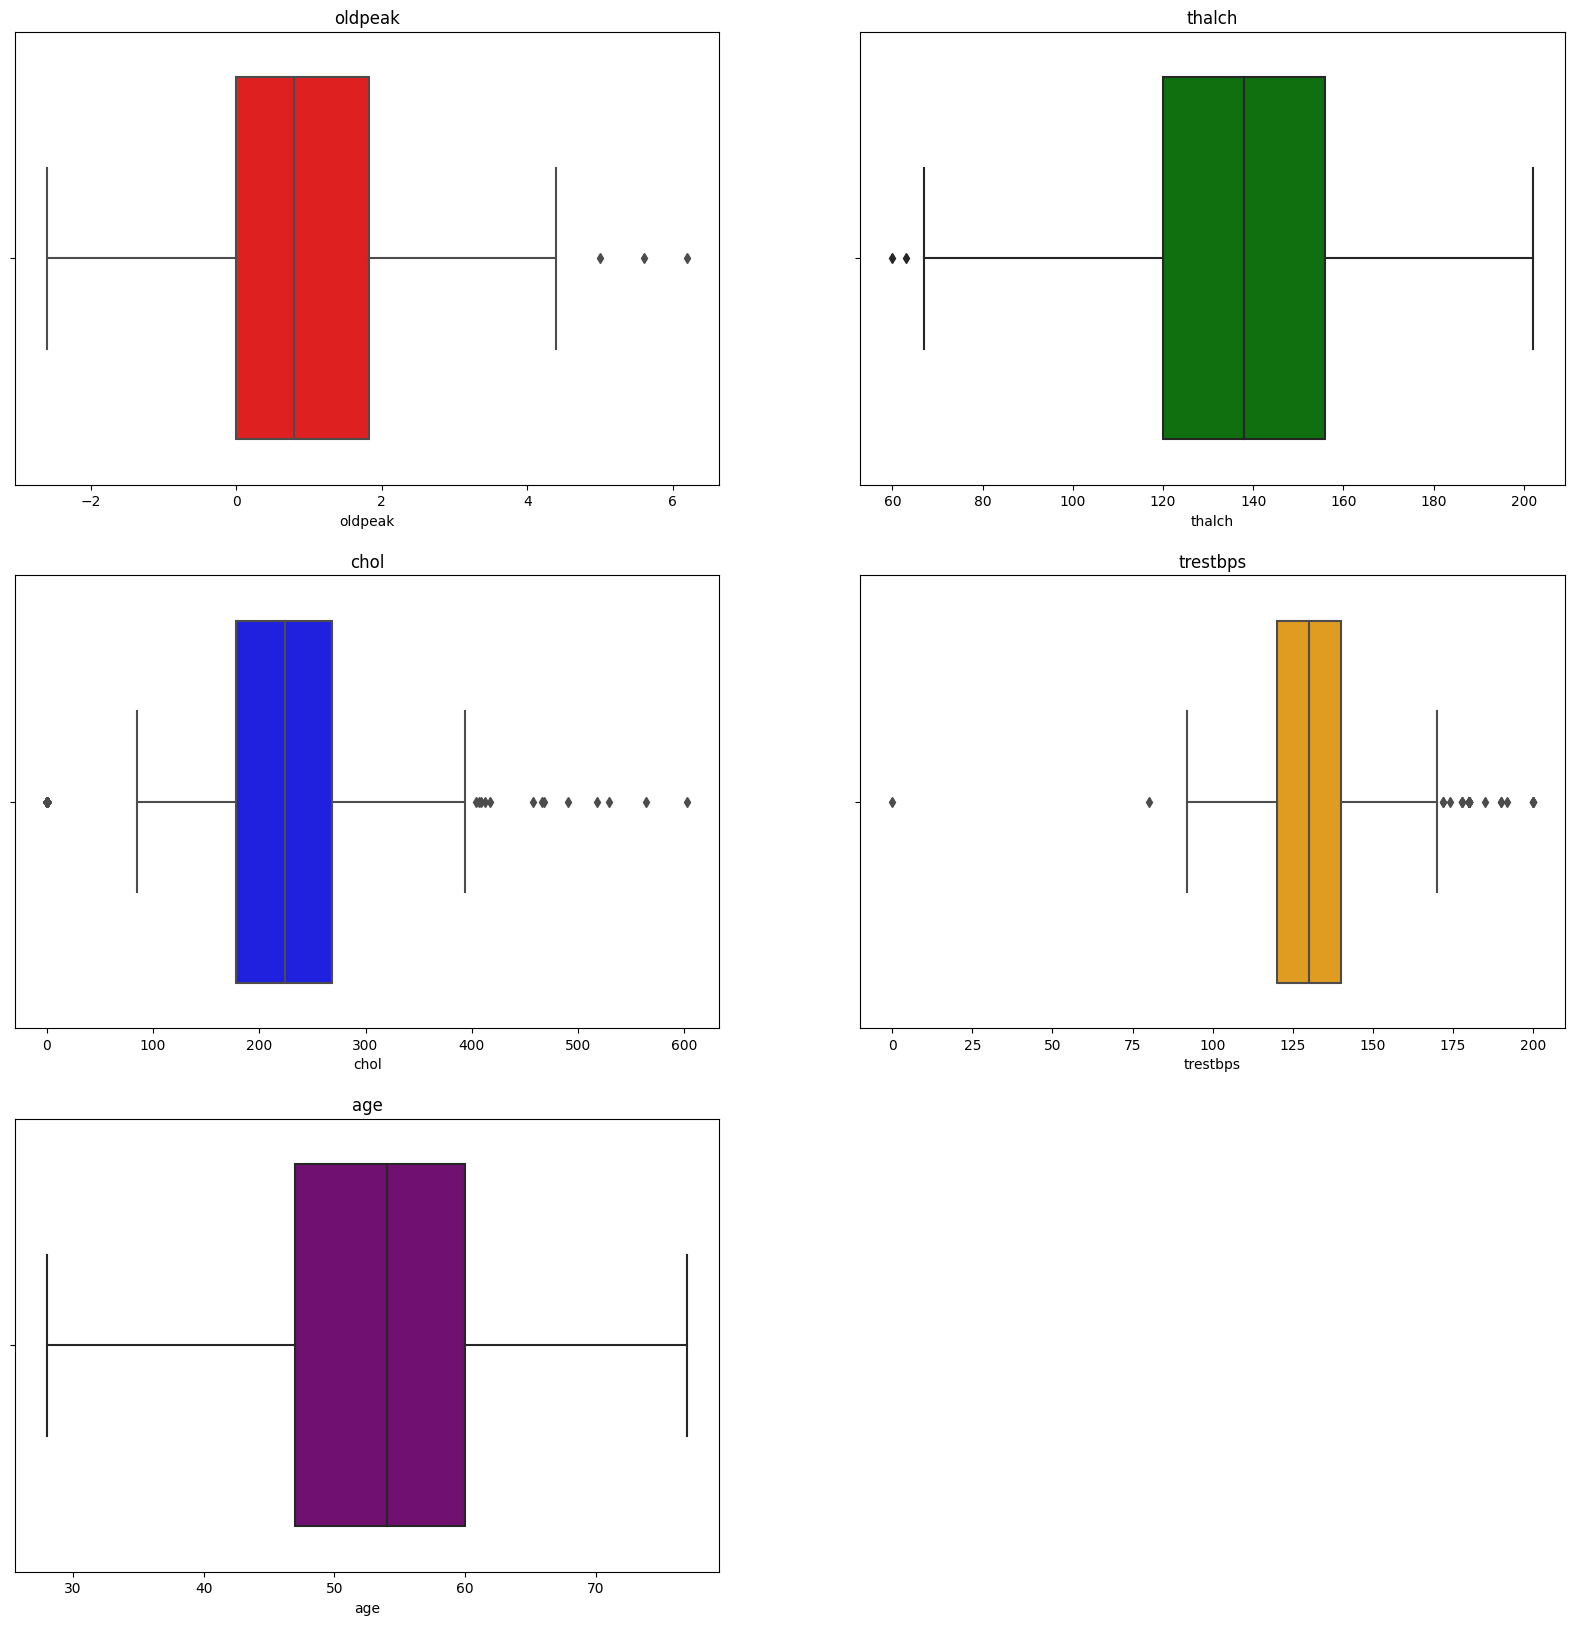

In [80]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

- **Examining the oldpeak column reveals the presence of outliers, which, however, can be considered valuable for providing unique information.**
  
- **Notably, in the thalch column, the value 60 appears as an outlier. It's worth noting that numerous individuals have thalch values reaching up to 60, so it may not be anomalous.**
  
- **The chol column exhibits 0 as an outlier, but it's noteworthy that this may not be significant since there are numerous instances of values being 0.**
  
- **The trestbps column contains an outlier with the value 0, and efforts will be made to address or remove it.**
  
- **No outliers are observed in the age column.**

In [81]:
## In my obseravtion column trestbps have the value 0 as as outlier so let's deal with it:
df[df['trestbps'] == 0]
# remove this row:
df = df.drop(df[df['trestbps'] == 0].index)

In [82]:
print(df.shape)

(919, 16)


### **<ins>Could there be a duplicate lurking within the dataframe? Let's unravel this mystery:</ins>**


In [83]:
# Check duplicates:
print('The number of duplicates in the dataset:', df.duplicated().sum())

The number of duplicates in the dataset: 0


**<span style="color:yellow">Rejoice! The dataset is pristine with no traces of duplicates to be found.</span>**

## ***<ins>Thrill awaits as we joyfully dive into the realm of Machine Learning, applying powerful models to train and elevate our capabilities.</ins>***



**Selecting the target column:**

The "num" column represents the stages of heart disease. Therefore, it will be treated as the target variable, and predictions for the "num" variable will be made based on the information from other columns. 

num:

0 :   411

1 :   265

2 :   109

3 :   106

4 :    28

Name: count, dtype: int64

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease


## **<ins>Scaling the numeric columns:</ins>**

In [84]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
    # Create a new MinMaxScaler for the column
    scaler = MinMaxScaler()

    # Fit and transform the data
    df[col] = scaler.fit_transform(df[[col]])

    # Store the scaler in the dictionary
    min_max_scalers[col] = scaler

## **<ins>Encoding the categorical columns:</ins>**

In [85]:
columns_to_encode = ['thal', 'ca', 'dataset','slope', 'exang', 'restecg','fbs', 'cp', 'sex','num']

# Dictionary to store LabelEncoders for each column
label_encoders = {}
# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

## <ins>Navigating X and y with Finesse</ins>:

### **`But hold on to your hats, folks! What's the story behind X and y? Let's embark on this delightful journey of discovery!`**

**<span style="color:blue">X (Input features):</span> This is a matrix or dataframe containing the independent variables, also known as features, that the model will use to make predictions. Each row of X corresponds to one observation, and each column corresponds to a different feature.**

**<span style="color:blue">y (Target variable):</span> This is a vector or column containing the dependent variable that the model is trying to predict. Each element of y corresponds to the target value for the corresponding observation in X.**

In [86]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0
1,2,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2
2,3,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1
3,4,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0
4,5,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0


In [87]:
X = df[['age','sex','dataset','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca']]
y = df['num']
X_train ,X_test ,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

## **<ins>Empowering Intelligence: Training Models</ins>.** 🤖💡

In [88]:
# creating function to find best model:
def find_best_model(X, y, X_test, y_test):
    # Creating the global variables that we will use inside and the outside of the function as well:
    global y_pred,best_model_name
    np.random.seed(42)
    models = {
        'LogisticRegression': (LogisticRegression(random_state=42), {}),
        'SVC': (SVC(random_state=42), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}),
        'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
        'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
        'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'n_estimators': [10, 100, 1000]}),
        'XGBClassifier': (XGBClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),
        'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}),
        'GaussianNB': (GaussianNB(), {}),
    }

    best_model_name = None
    best_accuracy = 0.0 

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(X, y)

            # You need to evaluate the model on the test set to get accuracy
            y_pred = grid_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Print the performance metrics
            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", accuracy)
            print("\n_________________________________________________________________________________\n")

            # Check if the current model has the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = name
        except Exception as e:
            print(f"Error for model {name}: {e}")

    # Retrieve the best model
    print("Best Model:", best_model_name)
    print('Test Accuracy of the Best Model:', (best_accuracy)*100)




In [89]:
%%time

find_best_model(X, y, X_test, y_test)

Model: LogisticRegression
Cross-validation Accuracy: 0.510144927536232
Test Accuracy: 0.5797101449275363

_________________________________________________________________________________

Model: SVC
Cross-validation Accuracy: 0.5526609645996674
Test Accuracy: 0.5398550724637681

_________________________________________________________________________________

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.47520194820622486
Test Accuracy: 0.6159420289855072

_________________________________________________________________________________

Model: RandomForestClassifier
Cross-validation Accuracy: 0.5221192682347351
Test Accuracy: 0.7246376811594203

_________________________________________________________________________________

Model: KNeighborsClassifier
Cross-validation Accuracy: 0.563512710857686
Test Accuracy: 0.6123188405797102

_________________________________________________________________________________

Model: GradientBoostingClassifier
Cross-validation Accur

**<span style="color:yellow">Obervations:</span>**
- The best model based on test accuracy is the XGBClassifier with an accuracy of  80.43%.

- The average cross-validation accuracy across all models is 52%.

- The average test accuracy across all models is 66%.
  

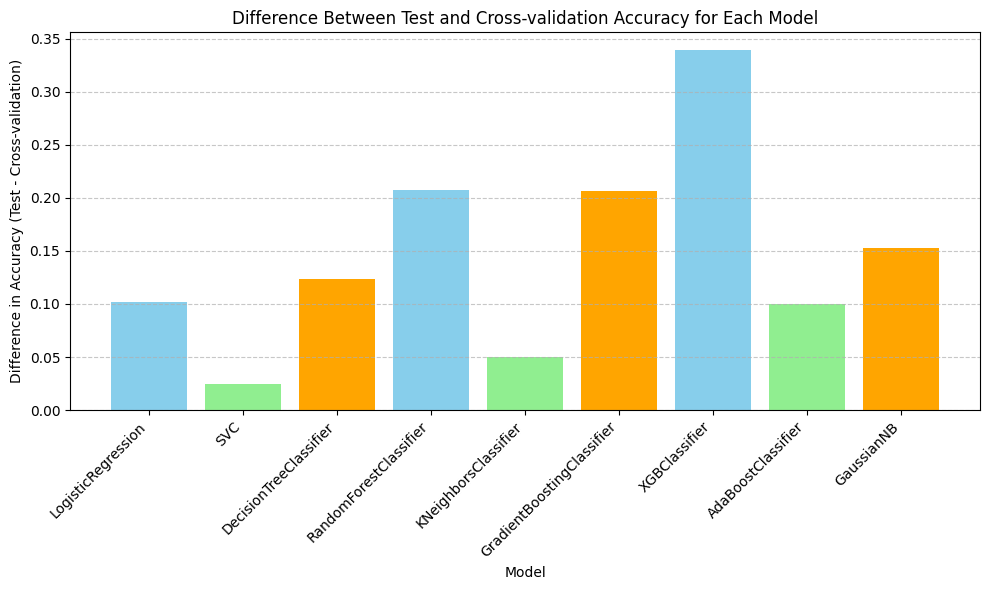

In [90]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    "Model": [
        "LogisticRegression",
        "SVC",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "KNeighborsClassifier",
        "GradientBoostingClassifier",
        "XGBClassifier",
        "AdaBoostClassifier",
        "GaussianNB",
    ],
    "Cross-validation Accuracy": [
        0.5177892611071514,
        0.5623901164172012,
        0.539552150154431,
        0.5243347588500832,
        0.5766215253029223,
        0.48948087431693993,
        0.4763245426467094,
        0.5341411261582325,
        0.4523758612497031,
    ],
    "Test Accuracy": [
        0.6195652173913043,
        0.5869565217391305,
        0.6630434782608695,
        0.7318840579710145,
        0.6268115942028986,
        0.6956521739130435,
        0.8152173913043478,
        0.6340579710144928,
        0.605072463768116,
    ],
}

df = pd.DataFrame(data)

# Calculate the difference between test and cross-validation accuracy
df["Difference"] = df["Test Accuracy"] - df["Cross-validation Accuracy"]

# Create a bar chart to visualize the difference between test and cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.bar(df["Model"], df["Difference"], color=["skyblue", "lightgreen", "orange"])
plt.xlabel("Model")
plt.ylabel("Difference in Accuracy (Test - Cross-validation)")
plt.title("Difference Between Test and Cross-validation Accuracy for Each Model")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Fine-tune the position of the plot within the figure
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()

# Show the plot
plt.show()

In [91]:
# Retrieve the best model
print("Best Model:", best_model_name)

Best Model: XGBClassifier


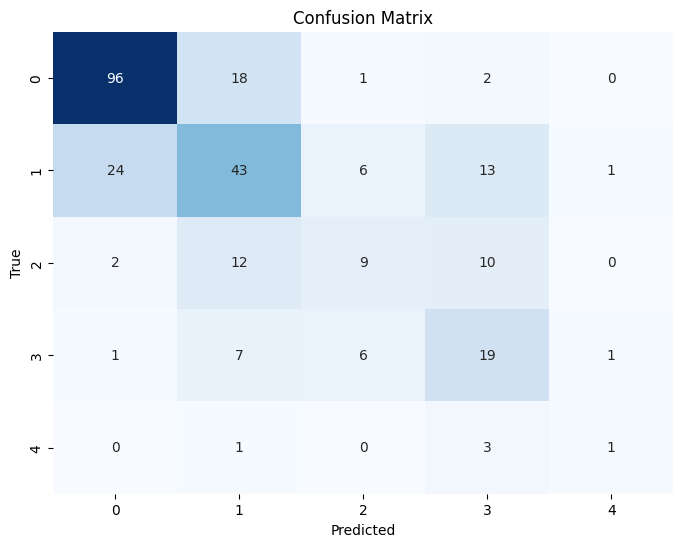

In [92]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## **<ins>Unleashing the magic of inverse transformation</ins>** ✨🔄 

**<span style="color:yellow">Transformation of the scaled column in reverse:</span>**

In [93]:
for col, scaler in min_max_scalers.items():
    # Use inverse_transform to get the original values
    df[col] = scaler.inverse_transform(df[[col]])

KeyError: "None of [Index(['oldpeak'], dtype='object')] are in the [columns]"

**<span style="color:yellow">Reversal of the transformation applied to the encoded columns:</span>**

In [ ]:
df.head()

In [ ]:
for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]

    # Inverse transform the data
    df[col] = le.inverse_transform(df[col])

In [ ]:
df.head(2)

#### **<ins>Saving the model:</ins>.**

In [ ]:
import pickle
                        
pickle.dump(best_model_name, open('model_best', 'wb'))

#### **<ins>Loading the model:</ins>.**

In [ ]:
model_b = pickle.load(open('model_best','rb'))

In [ ]:
print (model_b)

In [ ]:
print(type(model_b))

## <ins>Inspecting the Model's Performance on Dummy Data</ins>. 🕵️‍♂️📈🔍

In [ ]:
classification_dummy_data = {
'age':[63.0	],
'sex':['Male'],
'dataset':['Cleveland'],
'cp':['typical angina'],
'trestbps':[145.0],
'chol':[233.0],
'fbs':['True'],
'restecg':['lv hypertrophy'],
'thalch':[150.0],
'exang':['False'],
'oldpeak':[2.3],
'slope':['downsloping'],
'ca':['0.0'],
}

# Convert the dictionary to a pandas DataFrame
new_X = pd.DataFrame(classification_dummy_data)

# Encode categorical or string features in the DataFrame
for col in new_X:
  if new_X[col].dtype == 'category' or new_X[col].dtype == 'object':
    new_X[col] = LabelEncoder().fit_transform(new_X[col])



In [ ]:
model = XGBClassifier(random_state=42)  # You can use the same random state as mentioned in the best model
model.fit(X_train, y_train)
new_predictions = model.predict(new_X)
pred = le.inverse_transform(new_predictions)
print("The predicted value(s) for the Results is(are):", pred[0])

-----------------------------------

## **<span style="color:blue"><ins>Conclusion:</ins></span>**

Exciting news alert! Drumroll, please! The shining star emerging victorious from our training odyssey is none other than the incredible XGBClassifier()! 🌟

Hold onto your hats as I reveal the enchanting number: the test accuracy of this dazzling model is an astounding  80.43! 🎉 

Now, as we bid farewell to this book, we're doing it with an explosion of joy and cheer. Hoping you've reveled in the delightful journey through the wondrous world of Data Science and ML within these pages! 🚀 Until next time, when we embark on another thrilling adventure! 🌟


-----------------------